In [2]:
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
tf = pd.read_csv("TaxiFare.csv")

In [4]:
tf.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
tf.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
48500,39:00.0,18.50,2014-11-26 11:39:00 UTC,-73.988315,40.776445,-73.992480,40.748912,2
38427,12:00.0,7.30,2010-12-19 13:12:00 UTC,-73.978748,40.741040,-73.997328,40.724800,1
21590,36:00.0,9.30,2009-10-02 00:36:00 UTC,-73.985840,40.735115,-73.953365,40.771678,5
45617,47:00.0,10.50,2011-08-17 00:47:00 UTC,-73.957815,40.717767,-73.931303,40.703708,1
13868,16:43.0,11.00,2009-02-26 23:16:43 UTC,-73.987657,40.719783,-73.939767,40.699440,1
2976,24:23.0,7.30,2009-07-23 09:24:23 UTC,-73.980749,40.745682,-74.001443,40.740147,1
28597,16:00.0,13.70,2010-04-27 10:16:00 UTC,-73.989860,40.747135,-74.006713,40.704833,2
15951,25:35.0,4.90,2011-10-17 21:25:35 UTC,-73.988042,40.738148,-73.999791,40.726963,2
42894,50:00.0,30.27,2010-03-10 21:50:00 UTC,-73.862853,40.769118,-73.980760,40.779148,2
44371,28:50.0,14.50,2011-05-21 00:28:50 UTC,-73.968445,40.799395,-73.973398,40.748408,1


In [6]:
tf.shape

(50000, 8)

In [7]:
tf.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [9]:
tf=pd.get_dummies(tf,columns=["no_of_passenger"])

In [10]:
tf.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger_0,no_of_passenger_1,no_of_passenger_2,no_of_passenger_3,no_of_passenger_4,no_of_passenger_5,no_of_passenger_6
19798,35:02.0,13.5,2013-01-16 13:35:02 UTC,-73.981348,40.778958,-73.974521,40.750758,0,1,0,0,0,0,0
36585,21:44.0,8.9,2010-11-03 17:21:44 UTC,-73.981777,40.766203,-73.991142,40.745998,0,1,0,0,0,0,0
17169,37:53.0,6.0,2014-09-18 10:37:53 UTC,-73.955861,40.779111,-73.960609,40.772794,0,1,0,0,0,0,0
24334,13:29.0,5.0,2014-04-11 19:13:29 UTC,-74.001902,40.719356,-74.006034,40.707619,0,1,0,0,0,0,0
39094,43:53.0,10.5,2013-09-21 19:43:53 UTC,-74.008394,40.734957,-74.000024,40.761418,0,1,0,0,0,0,0
45971,48:00.0,7.3,2012-08-01 11:48:00 UTC,-73.978745,40.740902,-74.005542,40.726722,0,1,0,0,0,0,0
30425,26:26.0,11.3,2010-01-11 20:26:26 UTC,-73.947537,40.775458,-73.984875,40.757574,0,0,0,0,1,0,0
28475,28:00.0,5.0,2012-10-21 15:28:00 UTC,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0
15690,06:31.0,6.5,2009-05-10 15:06:31 UTC,-73.965047,40.775506,-73.978234,40.762532,0,0,0,0,1,0,0
41526,54:46.0,4.5,2015-06-06 11:54:46 UTC,-73.993164,40.748096,-74.002686,40.748596,0,0,0,1,0,0,0


In [11]:
tf.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger_0       0
no_of_passenger_1       0
no_of_passenger_2       0
no_of_passenger_3       0
no_of_passenger_4       0
no_of_passenger_5       0
no_of_passenger_6       0
dtype: int64

In [12]:
tf.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger_0         uint8
no_of_passenger_1         uint8
no_of_passenger_2         uint8
no_of_passenger_3         uint8
no_of_passenger_4         uint8
no_of_passenger_5         uint8
no_of_passenger_6         uint8
dtype: object

In [13]:
tf=tf.drop(["unique_id","date_time_of_pickup"],axis=1)

In [14]:
tf.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger_0         uint8
no_of_passenger_1         uint8
no_of_passenger_2         uint8
no_of_passenger_3         uint8
no_of_passenger_4         uint8
no_of_passenger_5         uint8
no_of_passenger_6         uint8
dtype: object

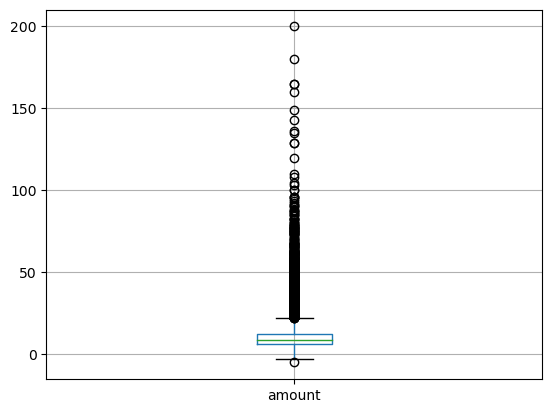

In [15]:
tf.boxplot(column="amount")
plt.show()

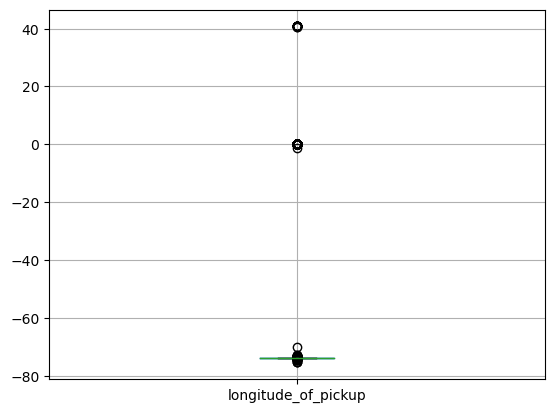

In [16]:
tf.boxplot(column="longitude_of_pickup")
plt.show()

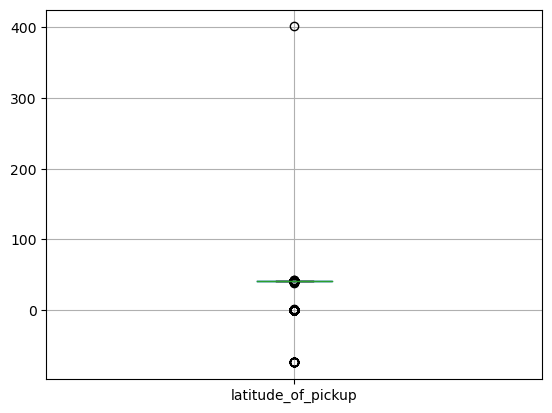

In [17]:
tf.boxplot(column="latitude_of_pickup")
plt.show()

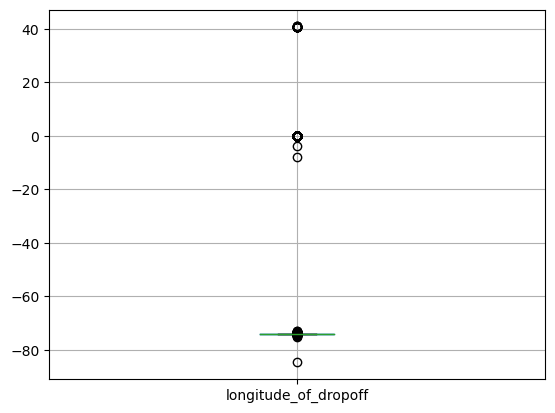

In [18]:
tf.boxplot(column="longitude_of_dropoff")
plt.show()

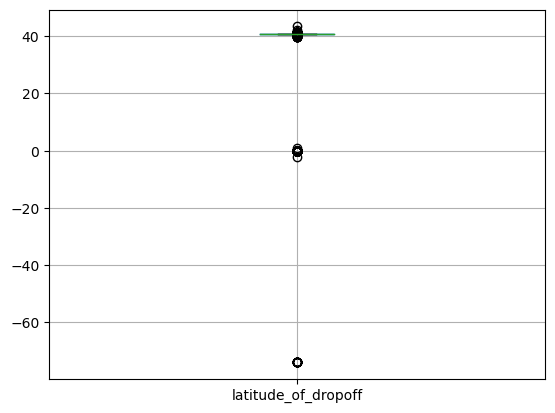

In [19]:
tf.boxplot(column="latitude_of_dropoff")
plt.show()

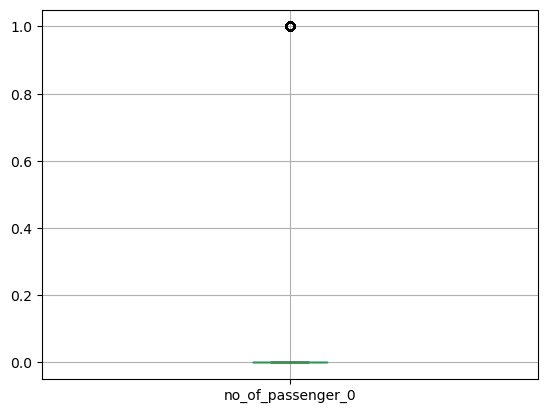

In [20]:
tf.boxplot(column="no_of_passenger_0")
plt.show()

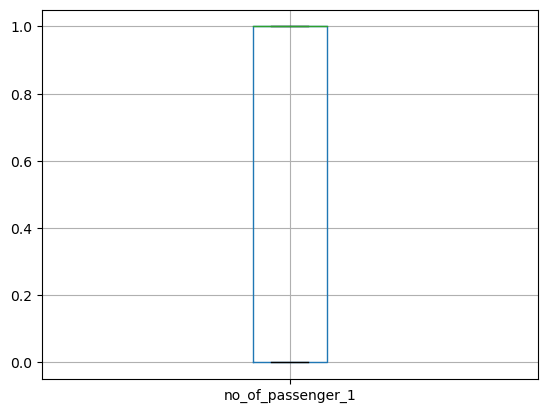

In [21]:
tf.boxplot(column="no_of_passenger_1")
plt.show()

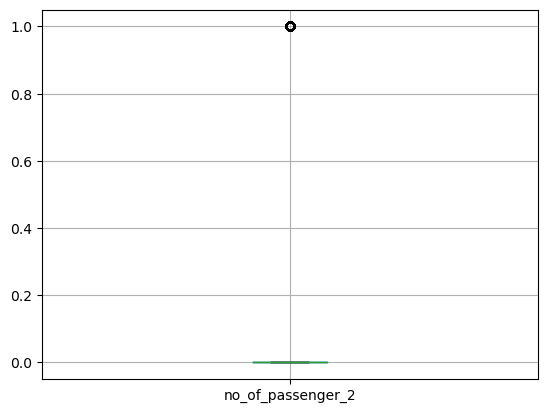

In [22]:
tf.boxplot(column="no_of_passenger_2")
plt.show()

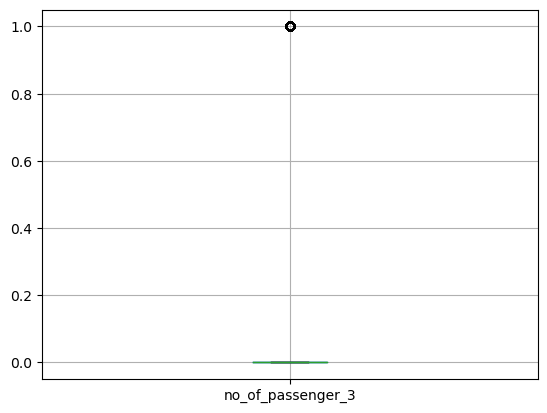

In [23]:
tf.boxplot(column="no_of_passenger_3")
plt.show()

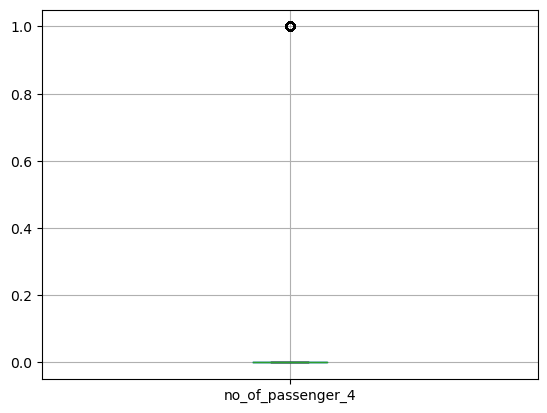

In [24]:
tf.boxplot(column="no_of_passenger_4")
plt.show()

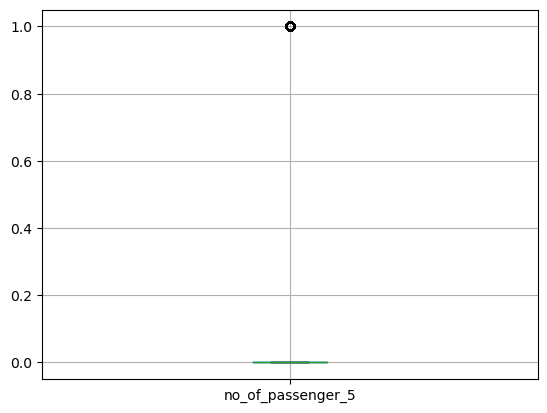

In [25]:
tf.boxplot(column="no_of_passenger_5")
plt.show()

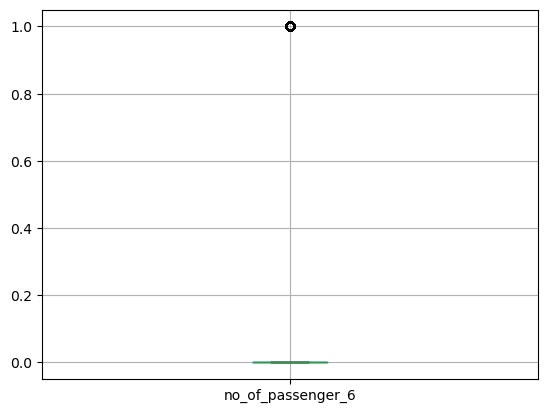

In [26]:
tf.boxplot(column="no_of_passenger_6")
plt.show()

In [27]:
def rem_out(c):
    sorted(c)
    q1,q3=c.quantile([0.25,0.75])
    IQR=q3-q1
    lr=q1-(1.5*IQR)
    ur=q3+(1.5*IQR)
    return lr,ur

In [28]:
l,u=rem_out(tf['amount'])
tf['amount']=np.where(tf['amount']>u,u,tf['amount'])
tf['amount']=np.where(tf['amount']<l,l,tf['amount'])

In [29]:
l,u=rem_out(tf['longitude_of_dropoff'])
tf['longitude_of_dropoff']=np.where(tf['longitude_of_dropoff']>u,u,tf['longitude_of_dropoff'])
tf['longitude_of_dropoff']=np.where(tf['longitude_of_dropoff']<l,l,tf['longitude_of_dropoff'])

In [30]:
l,u=rem_out(tf['latitude_of_pickup'])
tf['latitude_of_pickup']=np.where(tf['latitude_of_pickup']>u,u,tf['latitude_of_pickup'])
tf['latitude_of_pickup']=np.where(tf['latitude_of_pickup']<l,l,tf['latitude_of_pickup'])

In [31]:
l,u=rem_out(tf['longitude_of_pickup'])
tf['longitude_of_pickup']=np.where(tf['longitude_of_pickup']>u,u,tf['longitude_of_pickup'])
tf['longitude_of_pickup']=np.where(tf['longitude_of_pickup']<l,l,tf['longitude_of_pickup'])

In [32]:
l,u=rem_out(tf['latitude_of_dropoff'])
tf['latitude_of_dropoff']=np.where(tf['latitude_of_dropoff']>u,u,tf['latitude_of_dropoff'])
tf['latitude_of_dropoff']=np.where(tf['latitude_of_dropoff']<l,l,tf['latitude_of_dropoff'])

In [33]:
l,u=rem_out(tf['no_of_passenger_0'])
tf['no_of_passenger_0']=np.where(tf['no_of_passenger_0']>u,u,tf['no_of_passenger_0'])
tf['no_of_passenger_0']=np.where(tf['no_of_passenger_0']<l,l,tf['no_of_passenger_0'])

In [34]:
l,u=rem_out(tf['no_of_passenger_1'])
tf['no_of_passenger_1']=np.where(tf['no_of_passenger_1']>u,u,tf['no_of_passenger_1'])
tf['no_of_passenger_1']=np.where(tf['no_of_passenger_1']<l,l,tf['no_of_passenger_1'])

In [35]:
l,u=rem_out(tf['no_of_passenger_2'])
tf['no_of_passenger_2']=np.where(tf['no_of_passenger_2']>u,u,tf['no_of_passenger_2'])
tf['no_of_passenger_2']=np.where(tf['no_of_passenger_2']<l,l,tf['no_of_passenger_2'])

In [36]:
l,u=rem_out(tf['no_of_passenger_3'])
tf['no_of_passenger_3']=np.where(tf['no_of_passenger_3']>u,u,tf['no_of_passenger_3'])
tf['no_of_passenger_3']=np.where(tf['no_of_passenger_3']<l,l,tf['no_of_passenger_3'])

In [37]:
l,u=rem_out(tf['no_of_passenger_4'])
tf['no_of_passenger_4']=np.where(tf['no_of_passenger_4']>u,u,tf['no_of_passenger_4'])
tf['no_of_passenger_4']=np.where(tf['no_of_passenger_4']<l,l,tf['no_of_passenger_4'])

In [38]:
l,u=rem_out(tf['no_of_passenger_5'])
tf['no_of_passenger_5']=np.where(tf['no_of_passenger_5']>u,u,tf['no_of_passenger_5'])
tf['no_of_passenger_5']=np.where(tf['no_of_passenger_5']<l,l,tf['no_of_passenger_5'])

In [39]:
l,u=rem_out(tf['no_of_passenger_6'])
tf['no_of_passenger_6']=np.where(tf['no_of_passenger_6']>u,u,tf['no_of_passenger_6'])
tf['no_of_passenger_6']=np.where(tf['no_of_passenger_6']<l,l,tf['no_of_passenger_6'])

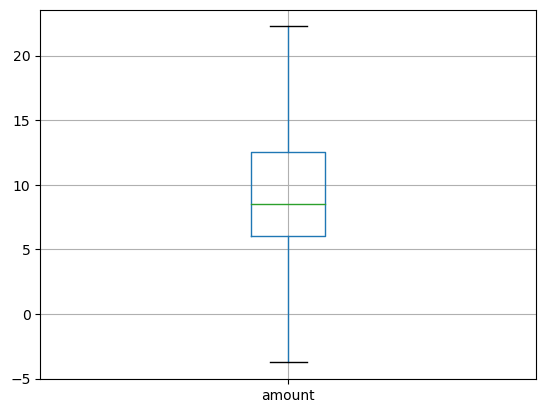

In [40]:
tf.boxplot(column="amount")
plt.show()

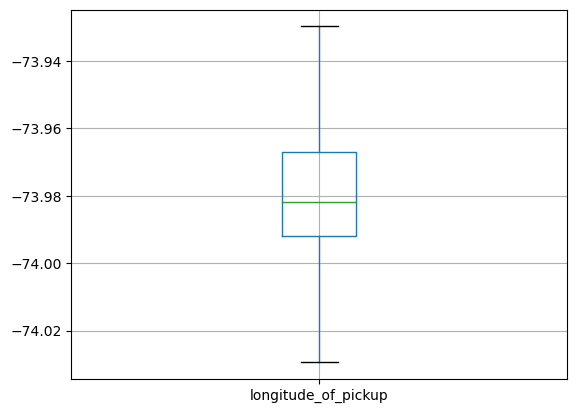

In [41]:
tf.boxplot(column="longitude_of_pickup")
plt.show()

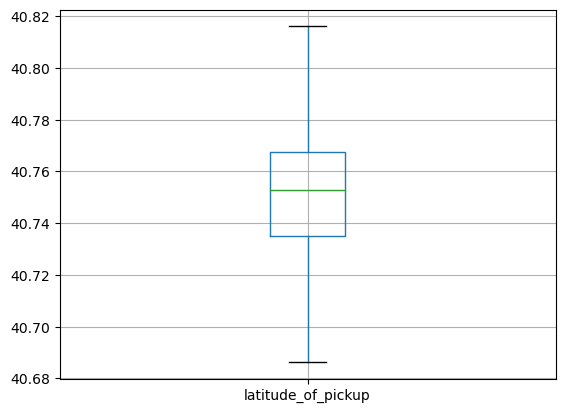

In [42]:
tf.boxplot(column="latitude_of_pickup")
plt.show()

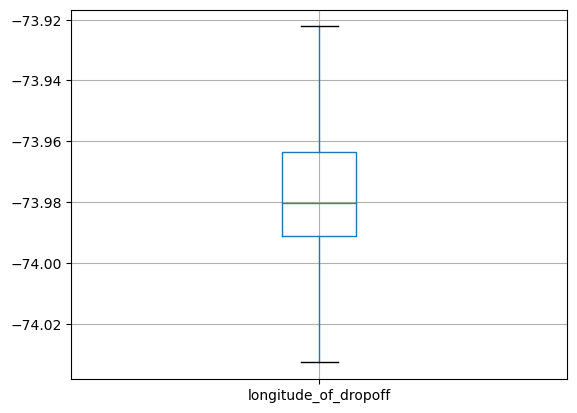

In [43]:
tf.boxplot(column="longitude_of_dropoff")
plt.show()

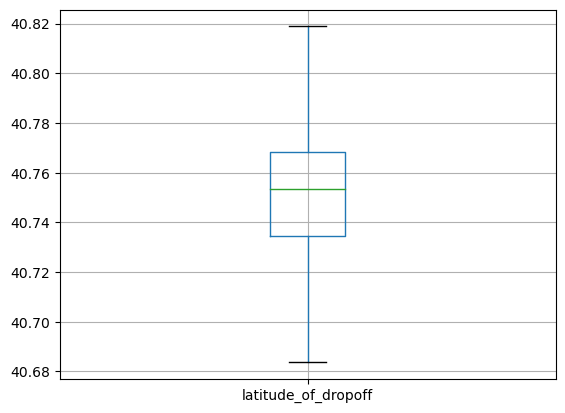

In [44]:
tf.boxplot(column="latitude_of_dropoff")
plt.show()

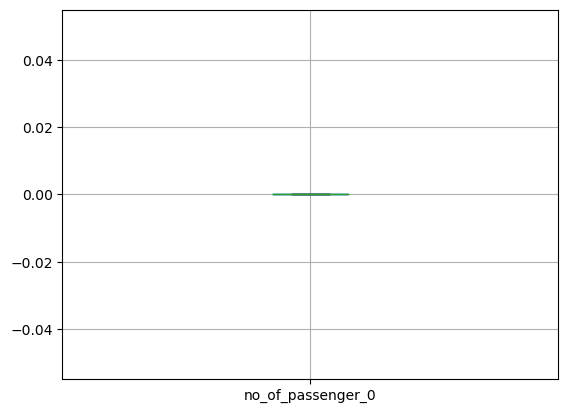

In [45]:
tf.boxplot(column="no_of_passenger_0")
plt.show()

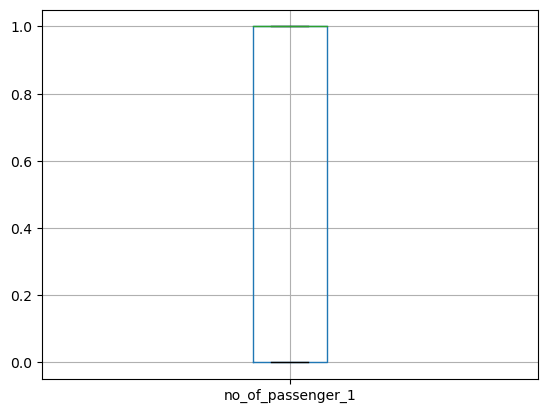

In [46]:
tf.boxplot(column="no_of_passenger_1")
plt.show()

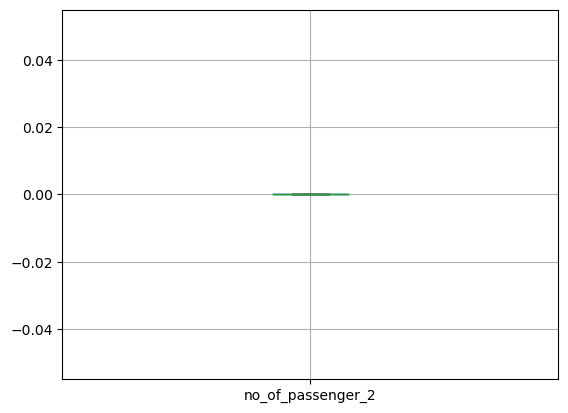

In [47]:
tf.boxplot(column="no_of_passenger_2")
plt.show()

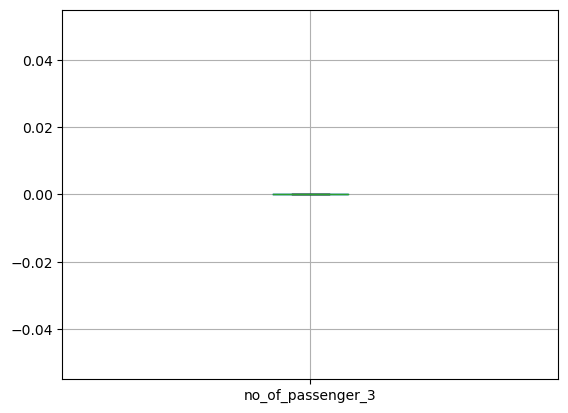

In [48]:
tf.boxplot(column="no_of_passenger_3")
plt.show()

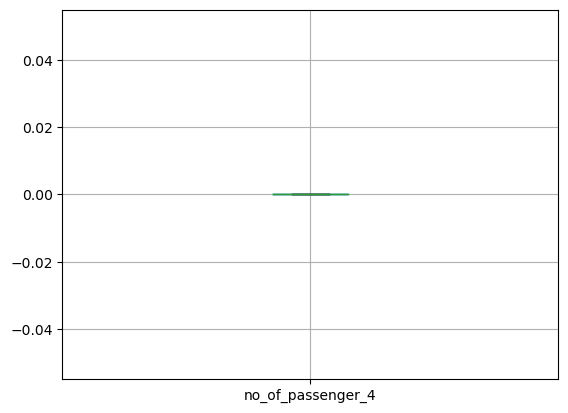

In [49]:
tf.boxplot(column="no_of_passenger_4")
plt.show()

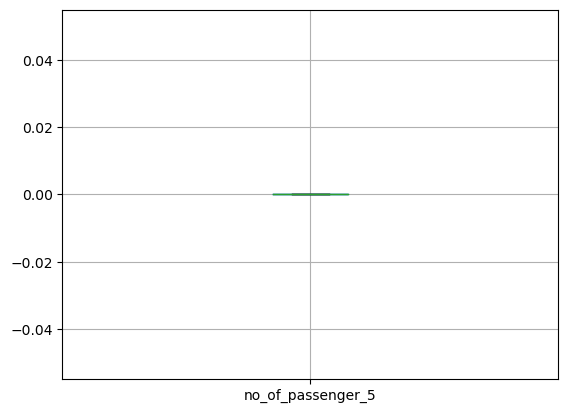

In [50]:
tf.boxplot(column="no_of_passenger_5")
plt.show()

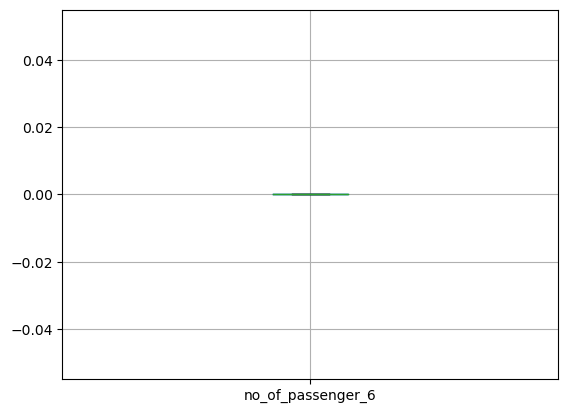

In [51]:
tf.boxplot(column="no_of_passenger_6")
plt.show()

In [52]:
# sns.pairplot(tf,diag_kind="kde")

In [53]:
dup=tf.duplicated()
dup.sum()

930

In [54]:
tf.drop_duplicates(inplace=True)

In [55]:
dup=tf.duplicated()
dup.sum()

0

In [56]:
tf.corr()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger_0,no_of_passenger_1,no_of_passenger_2,no_of_passenger_3,no_of_passenger_4,no_of_passenger_5,no_of_passenger_6
amount,1.000000,0.152914,-0.117681,0.236080,-0.125036,NaN,-0.022629,NaN,NaN,NaN,NaN,NaN
longitude_of_pickup,0.152914,1.000000,0.423854,0.352200,0.193125,NaN,0.006831,NaN,NaN,NaN,NaN,NaN
latitude_of_pickup,-0.117681,0.423854,1.000000,0.176093,0.456619,NaN,0.013792,NaN,NaN,NaN,NaN,NaN
longitude_of_dropoff,0.236080,0.352200,0.176093,1.000000,0.387670,NaN,0.004661,NaN,NaN,NaN,NaN,NaN
latitude_of_dropoff,-0.125036,0.193125,0.456619,0.387670,1.000000,NaN,0.008050,NaN,NaN,NaN,NaN,NaN
no_of_passenger_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_passenger_1,-0.022629,0.006831,0.013792,0.004661,0.008050,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
no_of_passenger_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_passenger_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_passenger_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
x=tf.drop("amount",axis=1)
y=tf[["amount"]]

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [59]:
project_model1=LinearRegression()

In [60]:
project_model1.fit(x_train,y_train)

LinearRegression()

In [61]:
project_model1.score(x_train,y_train)

0.1341393313229472

In [62]:
project_model1.score(x_test,y_test)

0.1282260853983952

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
project_model2=DecisionTreeRegressor(max_depth=20,max_leaf_nodes=70,min_samples_leaf=80)

In [65]:
project_model2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=70, min_samples_leaf=80)

In [66]:
project_model2.score(x_train,y_train)

0.6789016723117733

In [67]:
project_model2.score(x_test,y_test)

0.6679201422298031

In [68]:
from sklearn.ensemble import AdaBoostRegressor

In [69]:
project_model3=AdaBoostRegressor(n_estimators=1)

In [70]:
project_model3.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=1)

In [71]:
project_model3.score(x_train,y_train)

0.37104648174051236

In [72]:
project_model3.score(x_test,y_test)

0.3572554543924823

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
project_model4=GradientBoostingRegressor(n_estimators=80,max_depth=6)

In [75]:
project_model4.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=80)

In [76]:
project_model4.score(x_train,y_train)

0.8009994449608194

In [77]:
project_model4.score(x_test,y_test)

0.7581683599147016